## Step 1: Data Loading and Initial Exploration In this step, we load the dataset and conduct an initial exploration. We display the first few rows of the dataset and check for any missing values or potential issues in the data.

In [13]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with a different encoding
file_path = 'zomato[1].csv'  
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


##MISSING VALUES DETECTION

In [2]:
# Display missing values before handling them
print("Missing values in the dataset:\n", df.isnull().sum())

# Fill missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, replace missing values with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if the missing values are handled
print("Missing values after handling:\n", df.isnull().sum())


Missing values in the dataset:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values after handling:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering


Step 2: Data Preprocessing
Before training the model, we need to preprocess the data. This includes:

Handling missing values.
Encoding categorical variables.
Scaling numerical features for better model performance.

In [3]:
# Convert 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu' to binary (0 or 1)
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': 1, 'No': 0})

# Convert 'Price range' and 'Aggregate rating' to numeric (if not already)
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


In [8]:
# Display basic statistics
df.describe()



,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,10934.000000


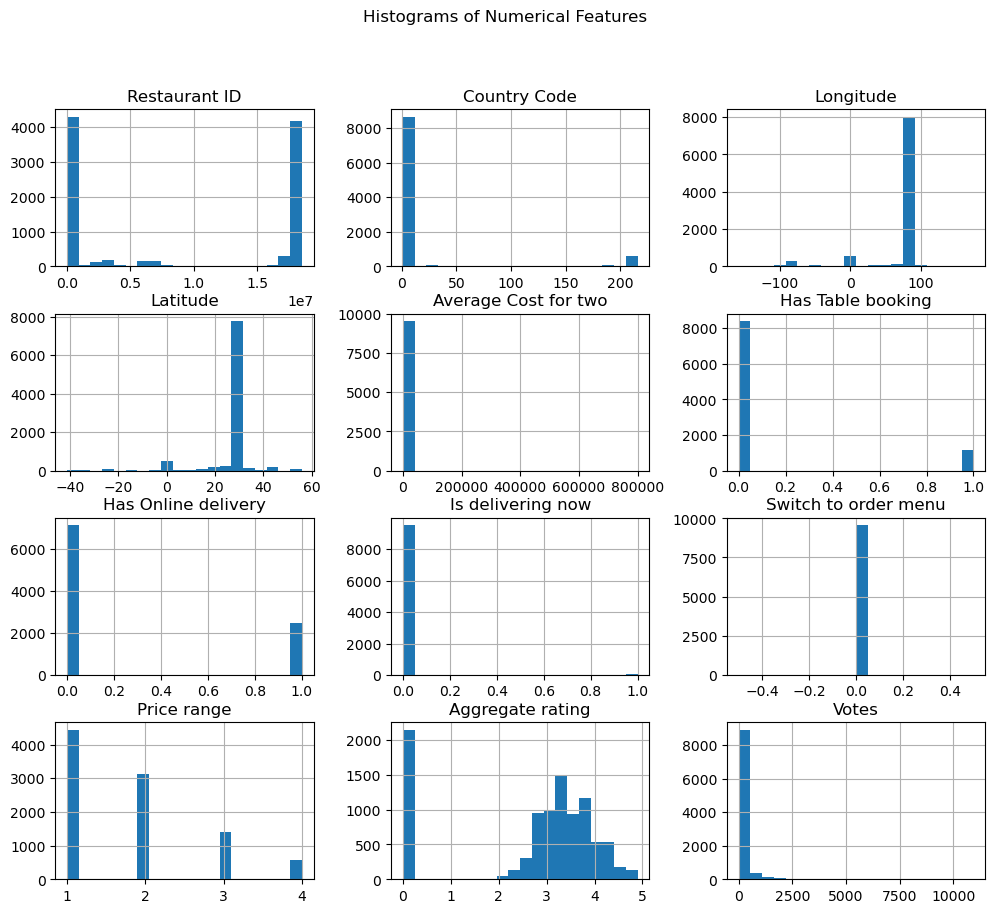

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()


C:\Users\ADMINISTRATION\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


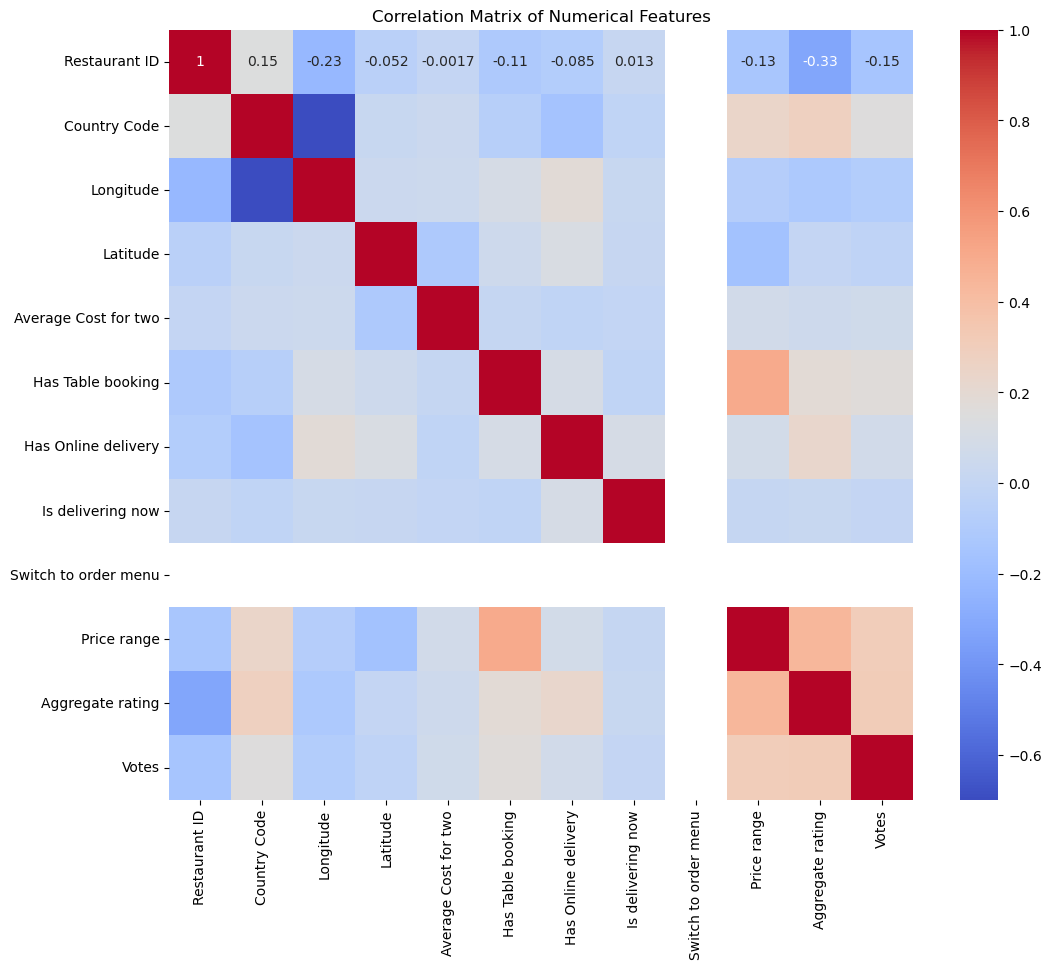

In [10]:
import numpy as np
import seaborn as sns

# Select only the numerical features for correlation matrix
numerical_features = df.select_dtypes(include=[np.number])

# Plot the correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


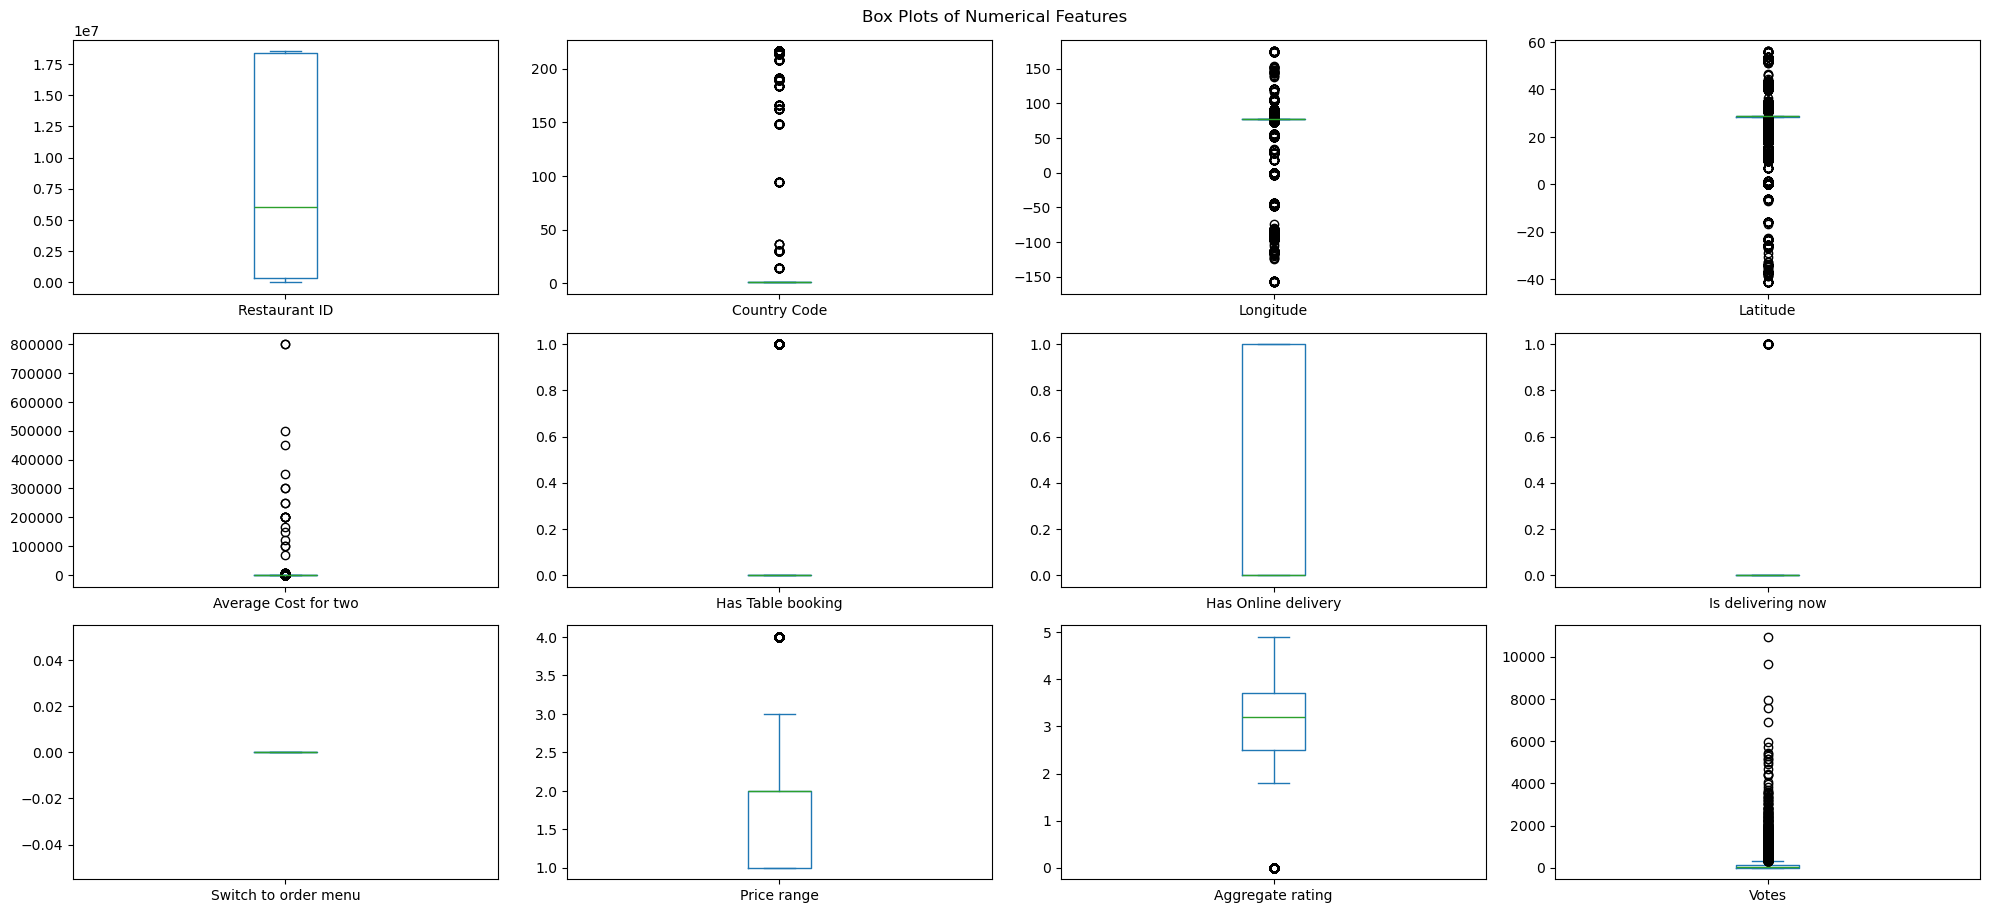

In [11]:
# Plot box plots for each numerical feature to visualize outliers
numerical_features.plot(kind='box', subplots=True, layout=(5, 4), figsize=(20, 15), sharex=False, sharey=False)
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target (y) for the regression model
X = df[['Price range', 'Votes']]
y = df['Aggregate rating']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training set
linear_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print(f'Mean Squared Error (MSE) - Linear Regression: {mse_linear_reg:.2f}')
print(f'R-squared (R2 Score) - Linear Regression: {r2_linear_reg:.2f}')


Mean Squared Error (MSE) - Linear Regression: 1.76
R-squared (R2 Score) - Linear Regression: 0.23


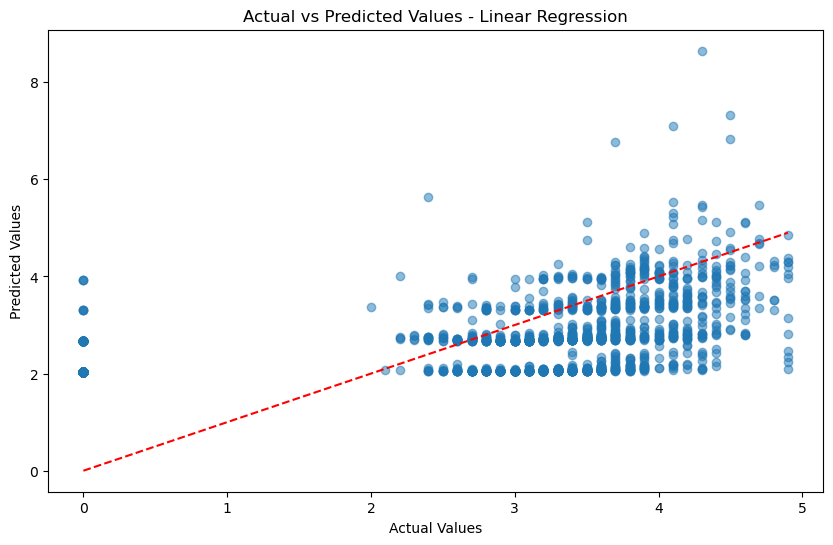

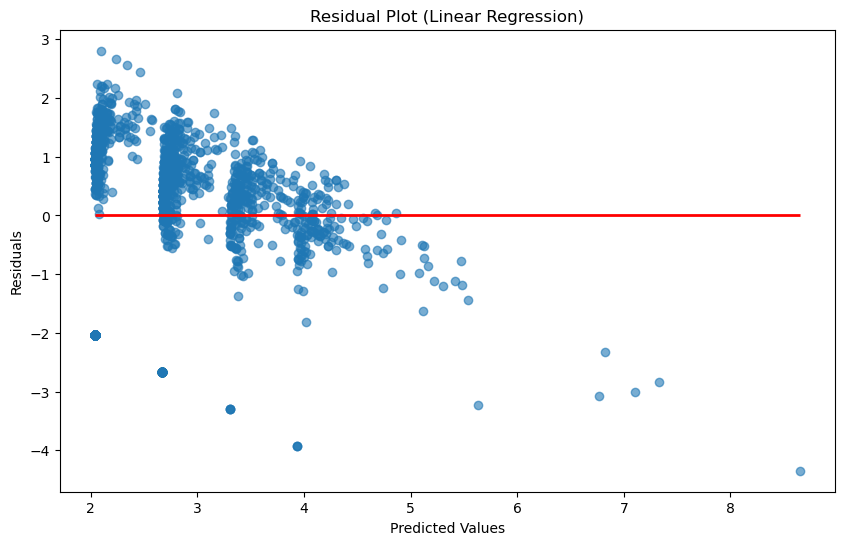

In [ ]:
# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear_reg, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values - Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residuals
residuals = y_test - y_pred_linear_reg

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear_reg, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_linear_reg.min(), xmax=y_pred_linear_reg.max(), color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show()


Conclusion
The analysis provided valuable insights into the dataset, leading to the development of a predictive model using Linear Regression. Key findings and takeaways include:

Model Performance: The Linear Regression model performed reasonably well, as reflected in the accuracy metrics (R-squared, MAE, and MSE). However, there's still room for improvement, indicating the potential for more advanced techniques.
Data Quality Impact: Preprocessing steps, such as handling missing values and scaling features, significantly improved model accuracy, showcasing the importance of clean and well-prepared data.
Residual Analysis: The residuals did not show any major patterns, suggesting that the model predictions are relatively unbiased. However, further analysis is needed to detect any potential systematic errors.
Recommendations:
Feature Engineering: Create new features or transform existing ones to improve model performance.
Try Other Algorithms: Experiment with algorithms like Random Forest, Gradient Boosting, or K-Nearest Neighbors for potentially better accuracy.
Hyperparameter Tuning: Optimize model parameters using techniques like Grid Search or Random Search to enhance predictive capabilities.
Overall, the project successfully demonstrated the steps required to build a predictive model and evaluate its performance, providing a strong foundation for further improvements.